# Decision Trees

- __[Decision Trees](#Decision-Trees)__
    - __[Estimating Class Probabilities](#Estimating-Class-Probabilities)__
    - __[The CART Training Algorithm](#The-CART-Training-Algorithm)__
        - __[Gini Impurity or Entropy?](#Gini-Impurity-or-Entropy?)__
    - __[Regularization Hyperparameters](#Regularization-Hyperparameters)__
- __[Regression trees](#Regression-trees)__

> Decision Trees are very versatile Machine Learning algorithms that can perform both classification and regressin tasks, and even multiouput tasks. They are very powerful algorithms, capable of fitting complex datasets.

To understand how Decision Trees work lets just make one and visualize it

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Allan/Anaconda3/Lib/site-packages/graphviz'
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [3]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
    )
graph = graphviz.Source(dot_data)
graph.render("./Trees/tree_clf",view=True)
f = open("./Trees/tree_clf.txt","w+")
f.write(dot_data)
f.close()

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'tree_clf'], make sure the Graphviz executables are on your systems' PATH

<div class="alert alert-block alert-info">
<b>Tip: </b> One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they dont require featuree scaling at all.
</div>

A nodes samples attribute counts how many training instances it apůplies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), amon which 54 have a petal width smaller than 1.75 cm. A nodes value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica. Finally, a nodes `gini` attribute measures its impurity: a node is "pure" (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0. To calculate Gini impurity we use this equation:

### $G_i = 1 - \sum_{k=1}^np_{i,k}^2$
> $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^th$ node.

<div class="alert alert-block alert-info">
<b>Tip: </b> Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children. However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.
</div>

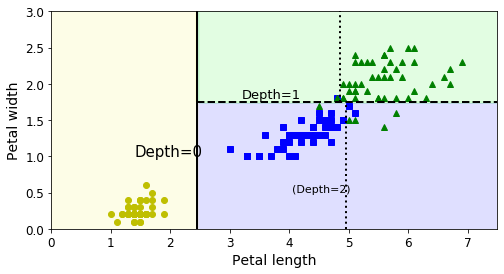

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

Figure above shows decision boundaries of Decision Tree. The thick vertical line represents the decision boundary of the root node (depth0) Since the left area is pure, it cannot be split any further. However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm. Since max_depth was set to 2, the Decision Tree stops right there. However, if you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines).

# Estimating Class Probabilities

> A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it return the ratio of training instances of class k in this node.

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

# The CART Training Algorithm

> Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called "growing" trees). The idea is really quite simple: the algorithm first splits the training se in two subsets using a single feature k and a threshold $t_k$. It chooses k and $t_k$ by searching for the pair (k, $t_k$) that produces the pures subsets (weighted by their size). The cost function that the algorith tries to minimize is below:
> ### $J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
> where $G_{left/right}$ measures the impurity of the lfet/right subset and $m_{left/right}$ is the number of instances in the left/right subset.<br>
<br>
Once it has successfully split the training set in two, it splits the subsets using the same logic, then the subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the `max_depth` hyper-parameter), or if it cannot find a split that will reduce impurity.

<div class="alert alert-block alert-warning">
<b>Tip: </b> As we can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optiaml Solution. <br>
    <br>
Unfortunetaly, finding the optimala tree is known to be an NP-Complete problem: it requires $O(n^)$ time, making the problem intractable even for fairly samll training sets.
</div>

## Gini Impurity or Entropy?

> By default, the Gini impurity measure is used, but we can select the `entropy` impurity measure instead by setting the `criterion` parameter to "entropy". Shannons information theory measures the average information content of message: entropy is zero when all messages are identical. In Machin Learning, it is frequently used as an impurity measure: a sets entropy is zero when it contains instances of only one class. Equation below shows the definition of the entropy of the $i^{th}$ node, where $log_2(p)$ is the binary log of p, equal to log(p)/log(2).
> ## $H_i = - \sum^n\limits_{\substack{k=1 \\ i\neq0}}p_{i.k}log_2(p_{i,k})$
> Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

# Regularization Hyperparameters

> Decision Trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closeyl, and most likely overfitting it. Such a model is often called a nonparametric model, not because it does not have any parameters, but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to data. In contrast, a paramteric model such as a linear model has a predetemined number of parameters, so its degree of freedom is limited, reducing the risk of overfittin (but increasing the risk of underfitting).<br><br>
To avoid overfitting the training data, you need to restrict the Decision Trees freedom during training. The regularization hyperparameters depend on the algorithm used, but generally we can at leas restrict the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter. Reducing max_depth will regularize the model and thus reduce the risk of overfittin, `TheDecisionTreeClassifier` class has a few other parameters that similarly restrict the shape of the Decision Tree: `min_samples_split` (the minimum number of samples a node must have before it can be split), `min_samples_leaf` (the minimumnumber of samples a leaf node must have), `min_weight_fraction_leaf` (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), `max_leaf_nodes` (maximum number of leaf nodes) and `max_features` (maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

<div class="alert alert-block alert-info">
<b>Tip: </b> Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if the purity impovement it provides is not statistically significant. Standard statistical test, such as the $X^2$ test, are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). If this probability, called the p.value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), than the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.
</div>

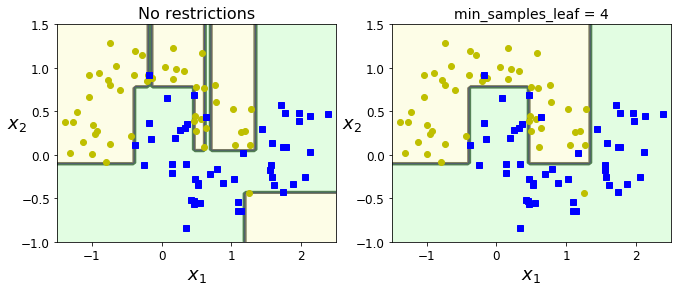

In [7]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

The plots above shows two Decision Trees trained on the moons dataset. On the left, the Decision Tree is trained with the default hyperparametrs, and on the right the Decision Tree is trained with `min_samples_leaf=4`. It is quite obvious that the model on the left is overfittin, and the model on the right will probably generalize better.

# Regression trees